# Plots to showcase initial condition

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import copy

from methods.SolutionClass2 import SolutionClass, _find_limits
from methods.save_load_data2 import save_data, load_data
from methods.make_input import make_plasma_input

#### STEP

In [2]:
params1 = make_plasma_input()
x_len = (params1["grid"]["x"][1]-params1["grid"]["x"][0])
params1["init"]["type"] = "soft-step"
params1["init"]["alpha"] = 0.4
params1["init"]["x_a"] = 0.0
params1["init"]["n_l"] = 1
params1["init"]["n_r"] = 0.2
params1["init"]["t_l"] = 1
params1["init"]["t_r"] = 0.2 #0.2
params1["grid"]["Nx"]= 800
params1["output"]["maxout"] = 100
params1["output"]["tend"] = 1e-6 #1e-4 to 1e-2
params1["timestepper"]["type"] = "ARK"
params1["timestepper"]["tableau"]  = "ARK-4-2-3"
params1["poisson"]["eps"]= 1e-12
params1["poisson"]["type"] = "bicgstab"
params1["physical"]["tau"] = 1
params1["physical"]["type"] = "original"
params1["advection"] = {"type" : "staggered", "variant" : "slope-limiter-explicit"}
params1["timestepper"]["rtol"] = 1e-5

#### WAVE

In [3]:
params2 = make_plasma_input()
x_len = (params2["grid"]["x"][1]-params2["grid"]["x"][0])
params2["init"]["type"] = "wave"
params2["init"]["amp"] = 0.4
params2["init"]["n_0"] = 0.6
params2["init"]["t_0"] = 0.6
params2["init"]["k"]   = 6*np.pi/x_len
params2["init"]["x_0"] = 0
params2["grid"]["Nx"]= 800
params2["output"]["maxout"] = 100
params2["output"]["tend"] = 1e-6 #1e-4 to 1e-2
params2["timestepper"]["type"] = "ARK"
params2["timestepper"]["tableau"]  = "ARK-4-2-3"
params2["poisson"]["eps"]= 1e-12
params2["poisson"]["type"] = "bicgstab"
params2["physical"]["tau"] = 1
params2["physical"]["type"] = "original"
params2["advection"] = {"type" : "staggered", "variant" : "slope-limiter-explicit"}
params2["timestepper"]["rtol"] = 1e-5

#### Simulates the conditions so as to display them

In [4]:
sol1 = SolutionClass(params1)
sol2 = SolutionClass(params2)

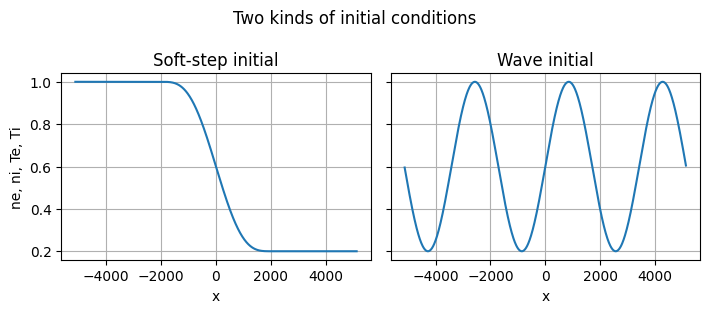

In [9]:
ti = 0

x1  = sol1.get_data_full()["x"]
ne1 = sol1.get_data_full()["ne"][ti,:]
x2  = sol2.get_data_full()["x"]
ne2 = sol2.get_data_full()["ne"][ti,:]

fig, ax = plt.subplots(1, 2, figsize=(8*0.9,3.5*0.9), sharex=True, sharey='row')
ax[0].plot(x1, ne1)
ax[0].set_xlabel("x")
ax[0].set_ylabel("ne, ni, Te, Ti")
ax[0].grid(True)
ax[0].set_title("Soft-step initial")


ax[1].plot(x2, ne2)
ax[1].set_xlabel("x")
ax[1].grid(True)
ax[1].set_title("Wave initial")

plt.suptitle("Two kinds of initial conditions")

plt.tight_layout()
plt.savefig("Figures/initial_conditions")